In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [14]:
# Load the dataset
df = pd.read_csv('C:\insurance.csv')

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [16]:
#size
df.size

10704

In [17]:
df.shape

(1338, 8)

In [18]:
#type of all columns
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [19]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [20]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


### Drop and Duplicate

In [21]:
#check the shape before drop duplictates

In [22]:
df.shape

(1338, 8)

In [23]:
df=df.drop_duplicates()

In [24]:
df.shape

(1337, 8)

as we can see we droped on duplicate value

In [25]:
df.isna().mean()*100

age               0.0
sex               0.0
bmi               0.0
children          0.0
smoker            0.0
region            0.0
charges           0.0
insuranceclaim    0.0
dtype: float64

In [26]:
 df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

There is no null values

## Data visualization

<Axes: >

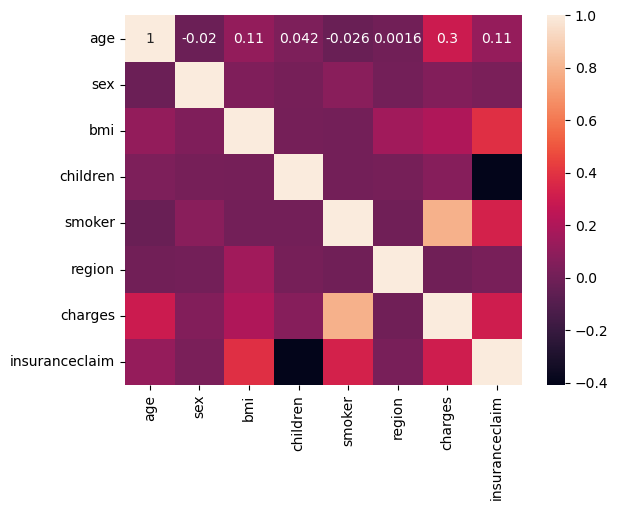

In [27]:
sns.heatmap(df.corr(),annot=True)

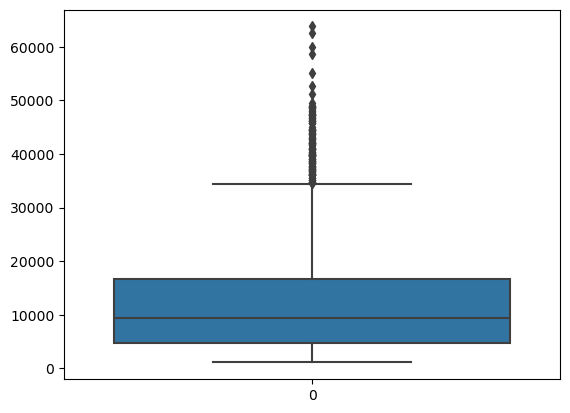

In [28]:
# boxplot

sns.boxplot(df['charges'])
plt.show()

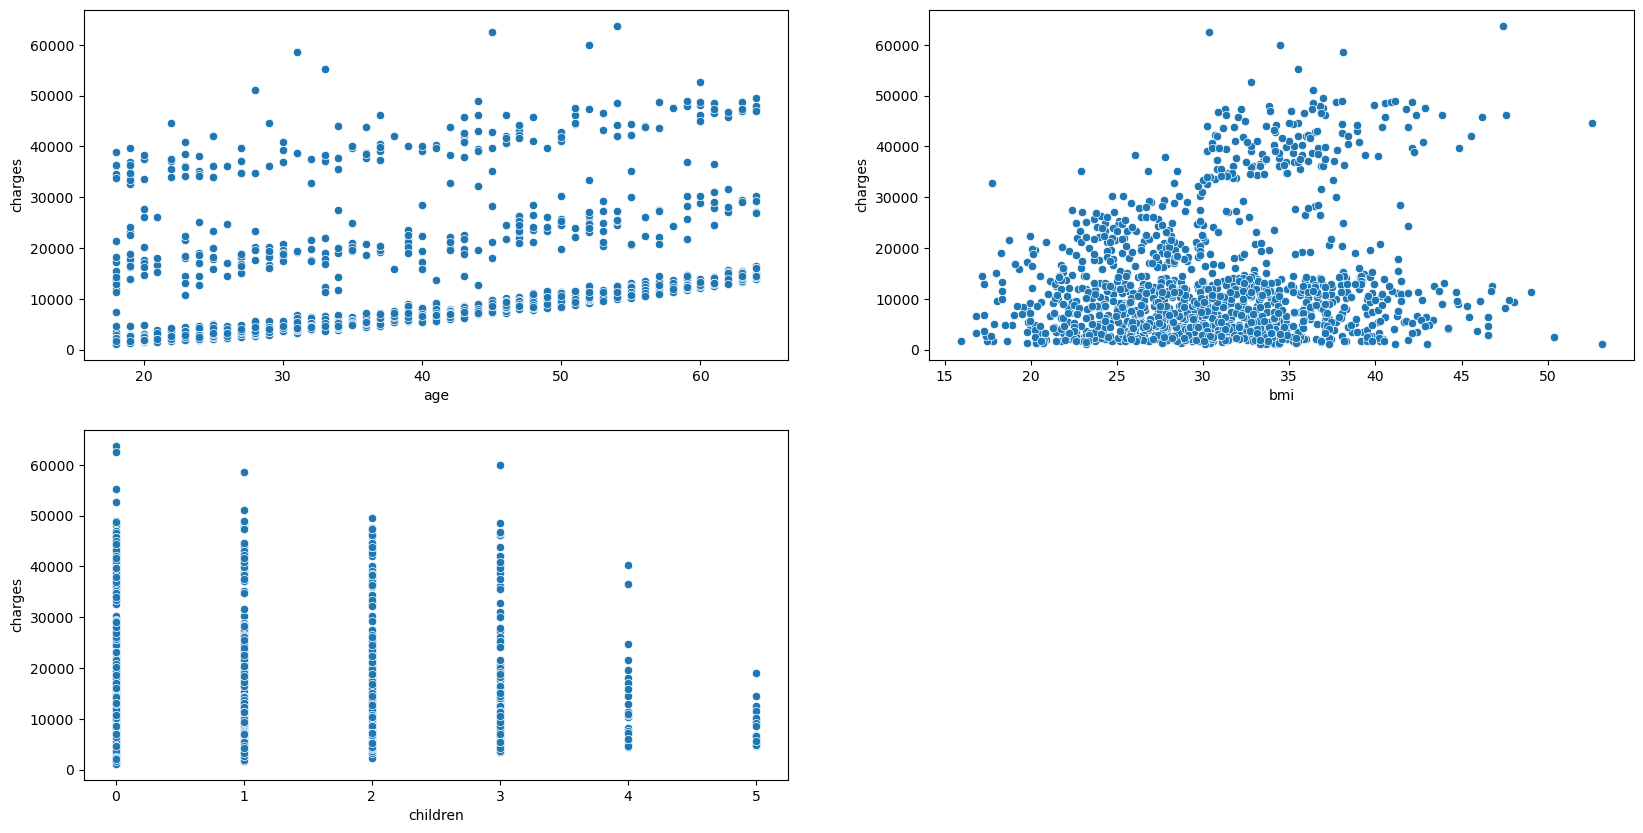

In [29]:
# Visualizing features

plt.figure(figsize=(20,10))
for i,feat in enumerate(['age','bmi','children']):
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=df[feat],y=df.charges)
plt.show()

Findings :-

Older people has to pay more  than younger ones

Higher BMI persons has to pay more than lower ones

Having high number of childern means can only spend less charges on insurance

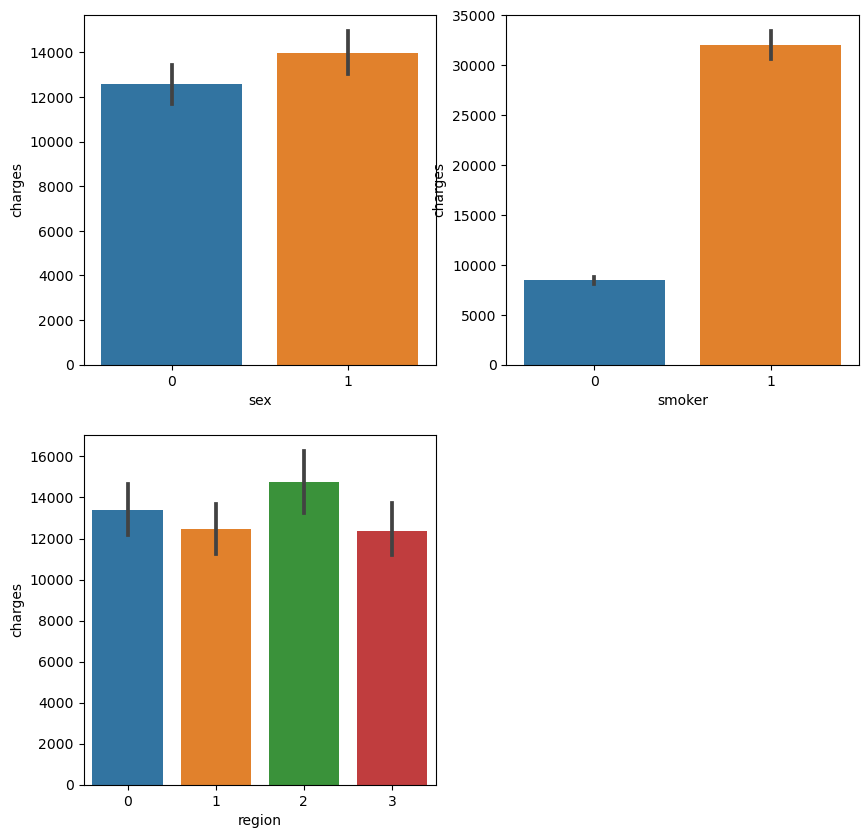

In [30]:
plt.figure(figsize=(10,10))
for i,feat in enumerate(['sex','smoker','region']):
    plt.subplot(2,2,i+1)
    sns.barplot(x=df[feat],y=df.charges)
plt.show()


Observations: -

charges doesnot varies much with respect to 'sex' feature

Smoker has to pay more than Non-Smoker

charges doesnot varies much with respect to 'region' feature

In [31]:
# Arranging dependent and independent variables for Modeling
X= df.drop(['insuranceclaim'], axis=1)
y = df['insuranceclaim']

In [32]:
# Splitting dataset into train and test sets

from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=1/4,random_state=1)

Here we do not have  continous value, so we will build classification  models

In [33]:
# divide data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1069, 7)
(268, 7)
(1069,)
(268,)


In [34]:
X_train

,age,sex,bmi,children,smoker,region,charges
435,60,1,33.110,3,0,2,13919.82290
202,60,0,24.035,0,0,1,13012.20865
1183,48,0,27.360,1,0,0,9447.38240
1291,19,1,34.900,0,1,3,34828.65400
773,19,0,28.880,0,1,1,17748.50620
...,...,...,...,...,...,...,...
716,49,0,22.610,1,0,1,9566.99090
906,27,1,32.585,3,0,0,4846.92015
1097,22,1,33.770,0,0,2,1674.63230
235,40,0,22.220,2,1,2,19444.26580


In [35]:
y_train

435     0
202     0
1183    0
1291    1
773     1
       ..
716     0
906     0
1097    1
235     0
1062    1
Name: insuranceclaim, Length: 1069, dtype: int64

In [36]:
X_test

,age,sex,bmi,children,smoker,region,charges
629,44,0,38.950,0,1,1,42983.45850
1087,57,1,31.540,0,0,1,11353.22760
283,55,0,32.395,1,0,0,11879.10405
790,39,0,41.800,0,0,2,5662.22500
594,41,1,40.260,0,0,2,5709.16440
...,...,...,...,...,...,...,...
1164,41,0,28.310,1,0,1,7153.55390
962,63,0,35.200,1,0,2,14474.67500
1158,20,0,30.590,0,0,0,2459.72010
1241,64,1,36.960,2,1,2,49577.66240


In [37]:
y_test

629     1
1087    1
283     1
790     1
594     1
       ..
1164    0
962     1
1158    1
1241    1
216     1
Name: insuranceclaim, Length: 268, dtype: int64

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Create a decision tree classifier
clf = DecisionTreeClassifier()

In [40]:
# Create a decision tree classifier
clf = DecisionTreeClassifier()

In [41]:
# Train the classifier on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
# Make predictions on the testing data
y_pred = clf.predict(X_test)

In [43]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [44]:
classification_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       117
           1       0.99      0.99      0.99       151

    accuracy                           0.99       268
   macro avg       0.99      0.99      0.99       268
weighted avg       0.99      0.99      0.99       268



In [45]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9888059701492538
Precision: 0.9888229000189613
Recall: 0.9888059701492538
F1 Score: 0.9888004206224222


# 

In [46]:
from sklearn.metrics import classification_report

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       117
           1       0.99      0.99      0.99       151

    accuracy                           0.99       268
   macro avg       0.99      0.99      0.99       268
weighted avg       0.99      0.99      0.99       268



In [48]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9888059701492538


The accuracy is 0.98, meaning that the model correctly predicted 98% of the instances.

In [49]:
# linear regression model
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [50]:
from sklearn.metrics import r2_score,mean_squared_error

#Linear Regression

from sklearn.linear_model import LinearRegression

le = LinearRegression()
le_model = le.fit(Xtrain,ytrain)
# predicting values for test data
le_ypredict = le_model.predict(Xtest)
print('MSE of Linear Regression : ' + str(round(mean_squared_error(ytest,le_ypredict),2)))
print('r2 score of Linear Regression : ' + str(round(r2_score(ytest,le_ypredict),2)))

MSE of Linear Regression : 0.14
r2 score of Linear Regression : 0.41


In [51]:
#DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt_model = dt.fit(Xtrain,ytrain)
# predicting values for test data
dt_ypredict = dt_model.predict(Xtest)
print('MSE of DecisionTreeRegressor : ' + str(round(mean_squared_error(ytest,dt_ypredict),2)))
print('r2 score of DecisionTreeRegressor : ' + str(round(r2_score(ytest,dt_ypredict),2)))

MSE of DecisionTreeRegressor : 0.03
r2 score of DecisionTreeRegressor : 0.89


In [52]:
# SVR

from sklearn.svm import SVR

sv = SVR()
sv_model = sv.fit(Xtrain,ytrain)
# predicting values for test data
sv_ypredict = sv_model.predict(Xtest)
print('MSE of SVR : ' + str(round(mean_squared_error(ytest,sv_ypredict),2)))
print('r2 score of SVR : ' + str(round(r2_score(ytest,sv_ypredict),2)))

MSE of SVR : 0.28
r2 score of SVR : -0.15
